# **Project Name**    -



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1**  - Aravind Dasarapu




# **Project Summary -**

With increase in urban population there is will be necessity for enchancement of mobility. Many cities have introduced Rental Bikes systems to meet this issue, therefore it is important to meet the standards by providing a stable supply of bikes as per demands is a major concern. In this project we tackle the bike count required at each hour for stable supply.

# **GitHub Link -**

https://github.com/aravind-dasarapu/Bike_Sharing_Demand

# **Problem Statement**


Given bike rent count for each hour for a year, with different attributes e.g temperature, windspeed, visibility etc,. Predict amount of bikes required for a certain hour, given all other attributes.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

from datetime import datetime
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
bike_df = pd.read_csv(r'/content/drive/MyDrive/AlmaBetter/Module 5/SeoulBikeData.csv',encoding='unicode_escape')

### Dataset First View

In [ ]:
# Dataset First Look
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
bike_df.shape

(8760, 14)

### Dataset Information

In [ ]:
# Dataset Info
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
Dataset_Duplicates = len(bike_df[bike_df.duplicated()])
print(Dataset_Duplicates)

0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

### What did you know about your dataset?

we came to know that there are no missing and duplicated values in the dataset

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Dataset Describe
bike_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


### Variables Description



**Date** = Date

**Hour** = Hour of the day (0-23)

**Temperature** = Temperature of the day

**Humidity** = Humidity measure

**Windspeed** = Windspeed

**Visibility** = Visibility measure

**Dew Point Temperature** = Dew Point Temperature Measure

**Solar Radiation** = Solar Radiation Measure

**Rainfall**= Rainfall in mm

**Snowfall** = Snowfall measure

**Seasons** = 1 = spring, 2 = summer, 3 = fall, 4 = winter

**Holiday** = Whether a holiday or not

**Functional Day** = Whether a functional day or not List item



### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
bike_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
bike_df.rename(columns = {'Rented Bike Count' : 'bike_count', 'Hour' : 'hour', 'Temperature(°C)' : 'temperature', 'Humidity(%)' : 'humidity', 'Visibility (10m)' : 'visibility', 'Solar Radiation (MJ/m2)' : 'solar_radiation', 'Rainfall(mm)' : 'rain_fall', 'Snowfall (cm)': 'snowfall', 'Seasons':'season', 'Holiday': 'holiday' },inplace=True)

In [ ]:
bike_df.rename(columns = {'Date': 'date', 'Wind speed (m/s)': 'wind_speed', 'Dew point temperature(°C)' : 'dew_point_temp','Functioning Day' : 'functioning_day'},inplace =True)

In [ ]:
bike_df['date'] = pd.to_datetime(bike_df['date'])

In [ ]:
bike_df['day'] = bike_df['date'].dt.day
bike_df['month'] = bike_df['date'].dt.month
bike_df['year'] = bike_df['date'].dt.year

In [ ]:
bike_df['weeknumber'] = bike_df['date'].dt.isocalendar().week

### What all manipulations have you done and insights you found?

We renamed column names for ease use of access and converted string format of data to datatime format and extracted week number, assigned new column to it

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

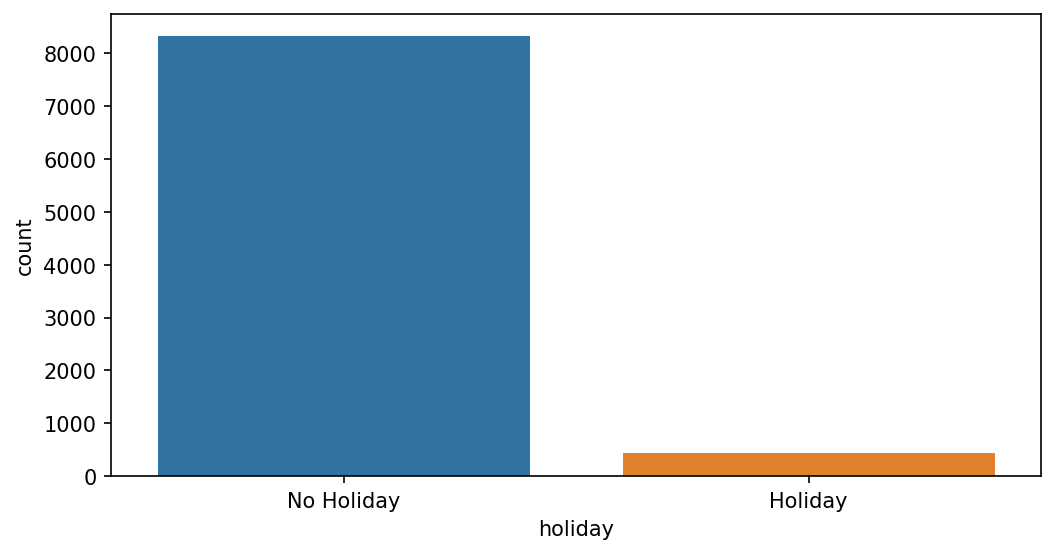

In [ ]:
plt.figure(figsize=(8,4), dpi=150)
sns.countplot(x='holiday', data = bike_df);

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

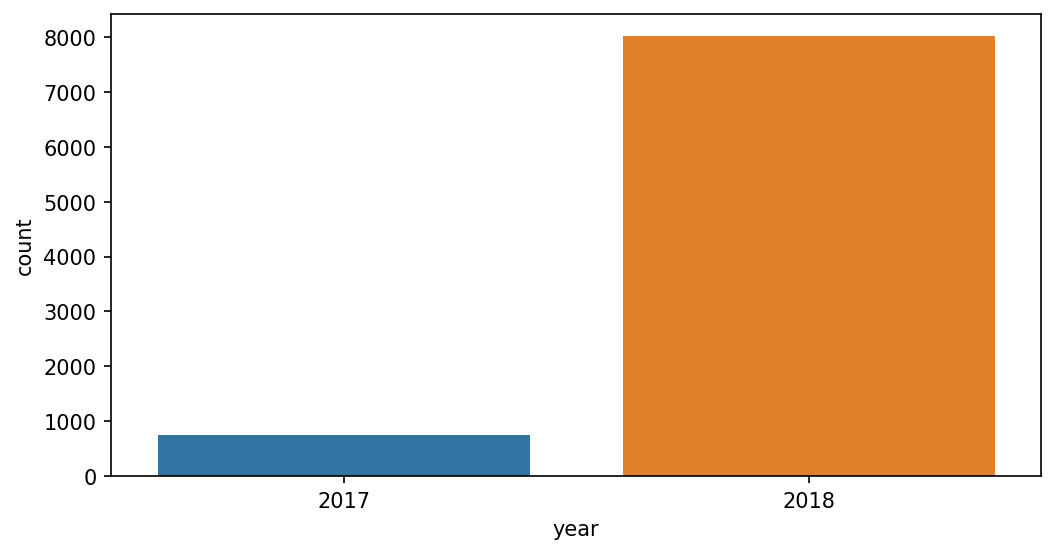

In [ ]:
plt.figure(figsize=(8,4), dpi=150)
sns.countplot(x='year', data = bike_df);

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

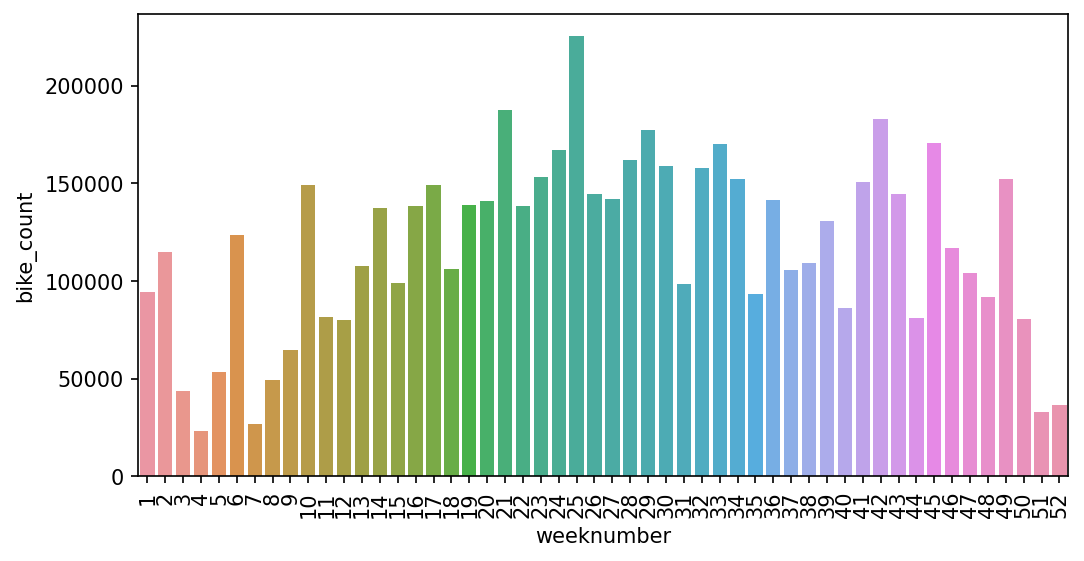

In [ ]:
week_number = bike_df.groupby("weeknumber").sum().reset_index()
plt.figure(figsize=(8,4), dpi=150)
sns.barplot(x="weeknumber", y="bike_count", data=week_number)
plt.xticks(rotation=90);

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

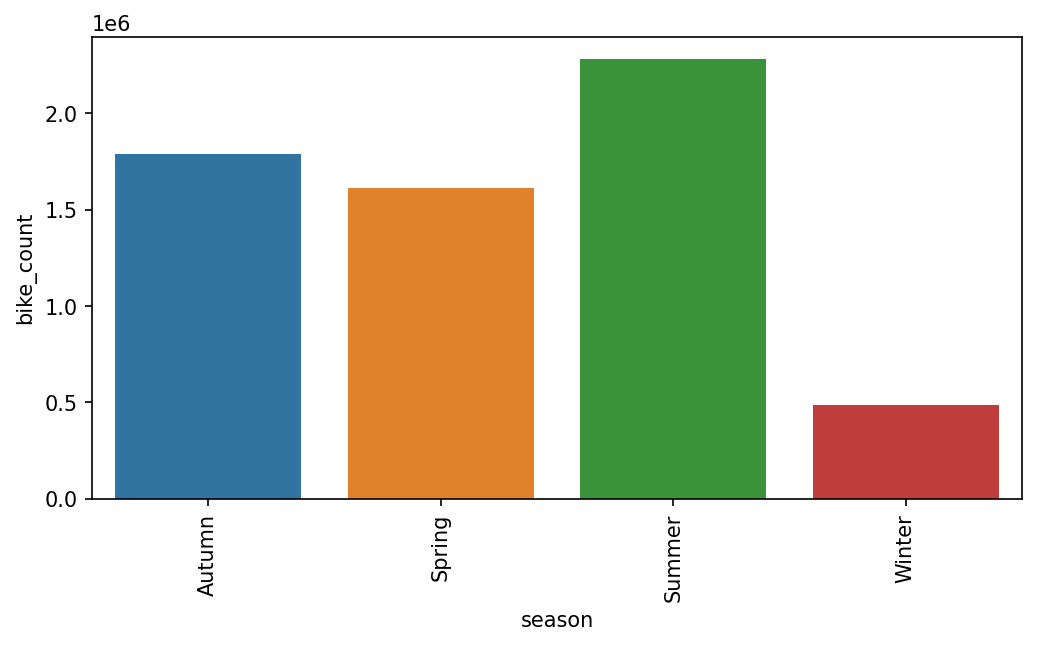

In [ ]:
seasons = bike_df.groupby("season").sum().reset_index()
plt.figure(figsize=(8,4), dpi=150)
sns.barplot(x="season", y="bike_count", data=seasons)
plt.xticks(rotation=90);

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

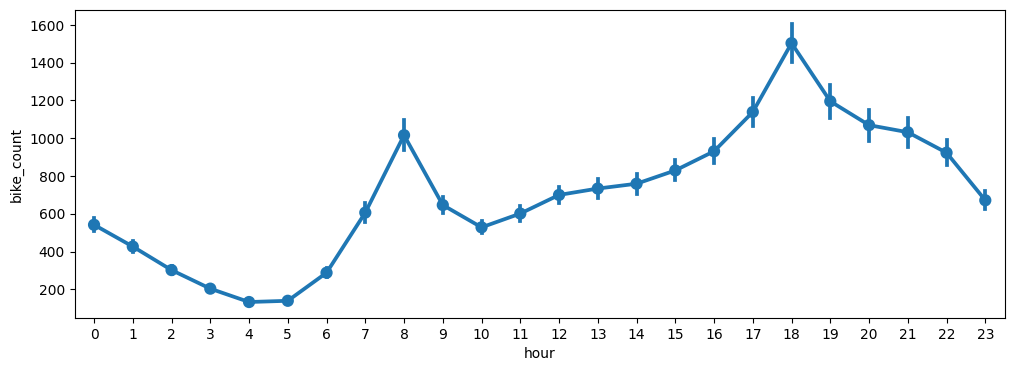

In [ ]:
plt.figure(figsize=(12,4),dpi = 100)
sns.pointplot(data=bike_df, x="hour", y="bike_count");

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

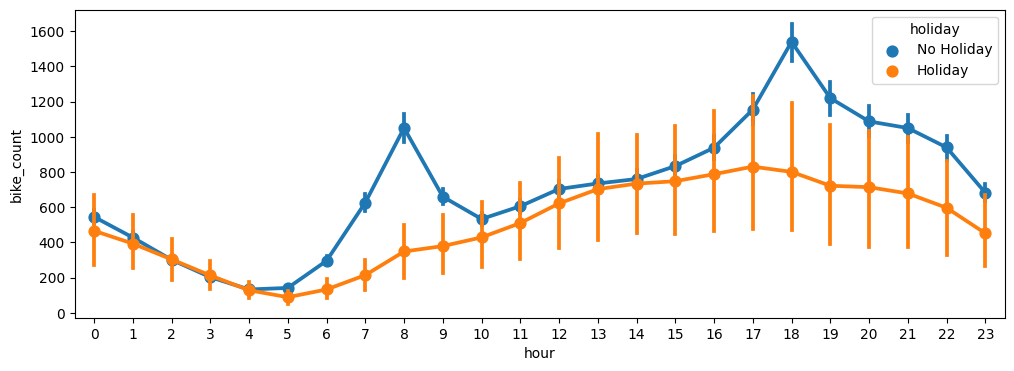

In [ ]:
plt.figure(figsize=(12,4),dpi = 100)
sns.pointplot(data=bike_df, x="hour", y="bike_count", hue="holiday");

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

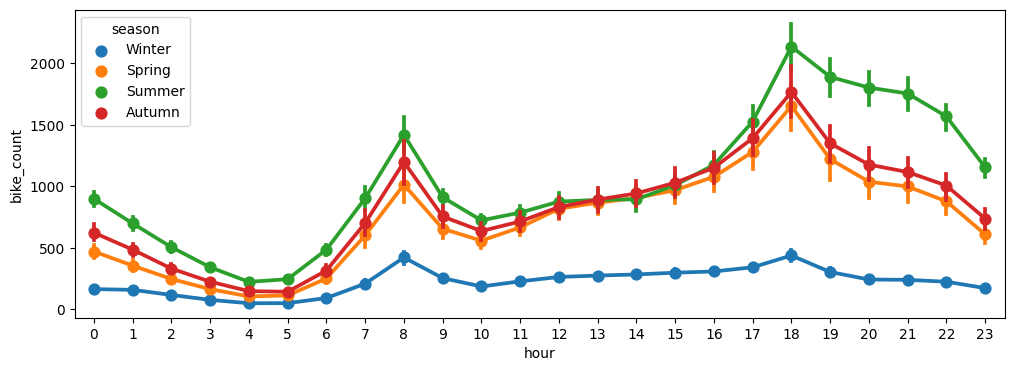

In [ ]:
plt.figure(figsize=(12,4),dpi = 100)
sns.pointplot(data=bike_df, x="hour", y="bike_count", hue = "season");

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

<Axes: >

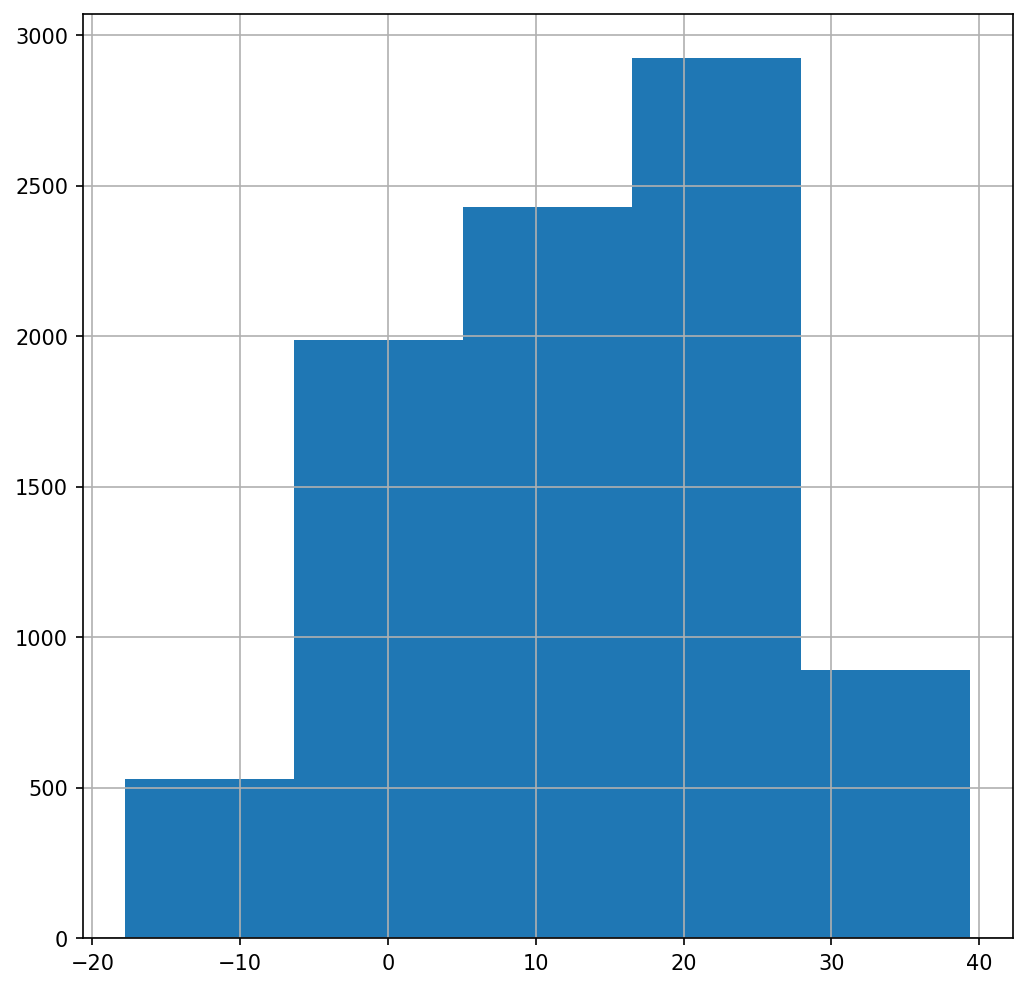

In [ ]:
plt.figure(figsize=(8,8), dpi=150)
bike_df['temperature'].hist(bins=5)

In [ ]:
bins = [-20,0,10,20,30,40]
labels = ['below_freezing','cold','cool','warm','hot']

In [ ]:
bike_df['temp_grade'] = pd.cut(x=bike_df['temperature'],bins = bins, labels = labels, include_lowest = True)

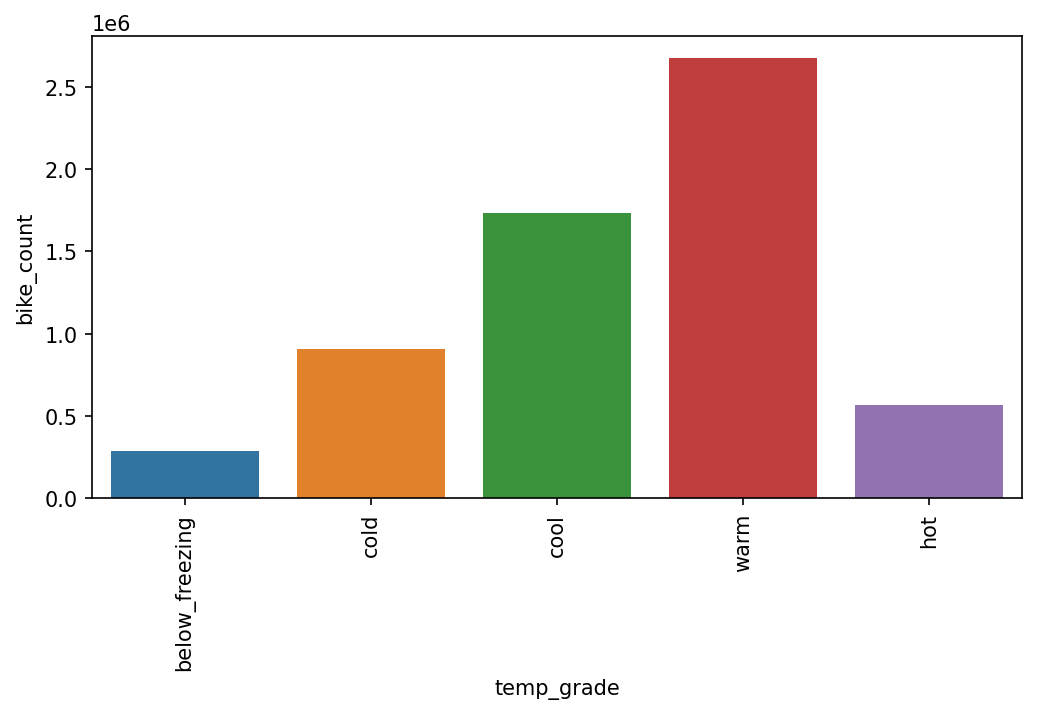

In [ ]:
temp_g_count = bike_df.groupby('temp_grade')['bike_count'].sum().reset_index()
plt.figure(figsize = (8,4), dpi = 150)
sns.barplot(x='temp_grade',y = 'bike_count', data = temp_g_count)
plt.xticks(rotation = 90);




##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
cols = ['bike_count','temperature', 'humidity', 'wind_speed', 'solar_radiation', 'visibility', 'snowfall','hour' , 'rain_fall']

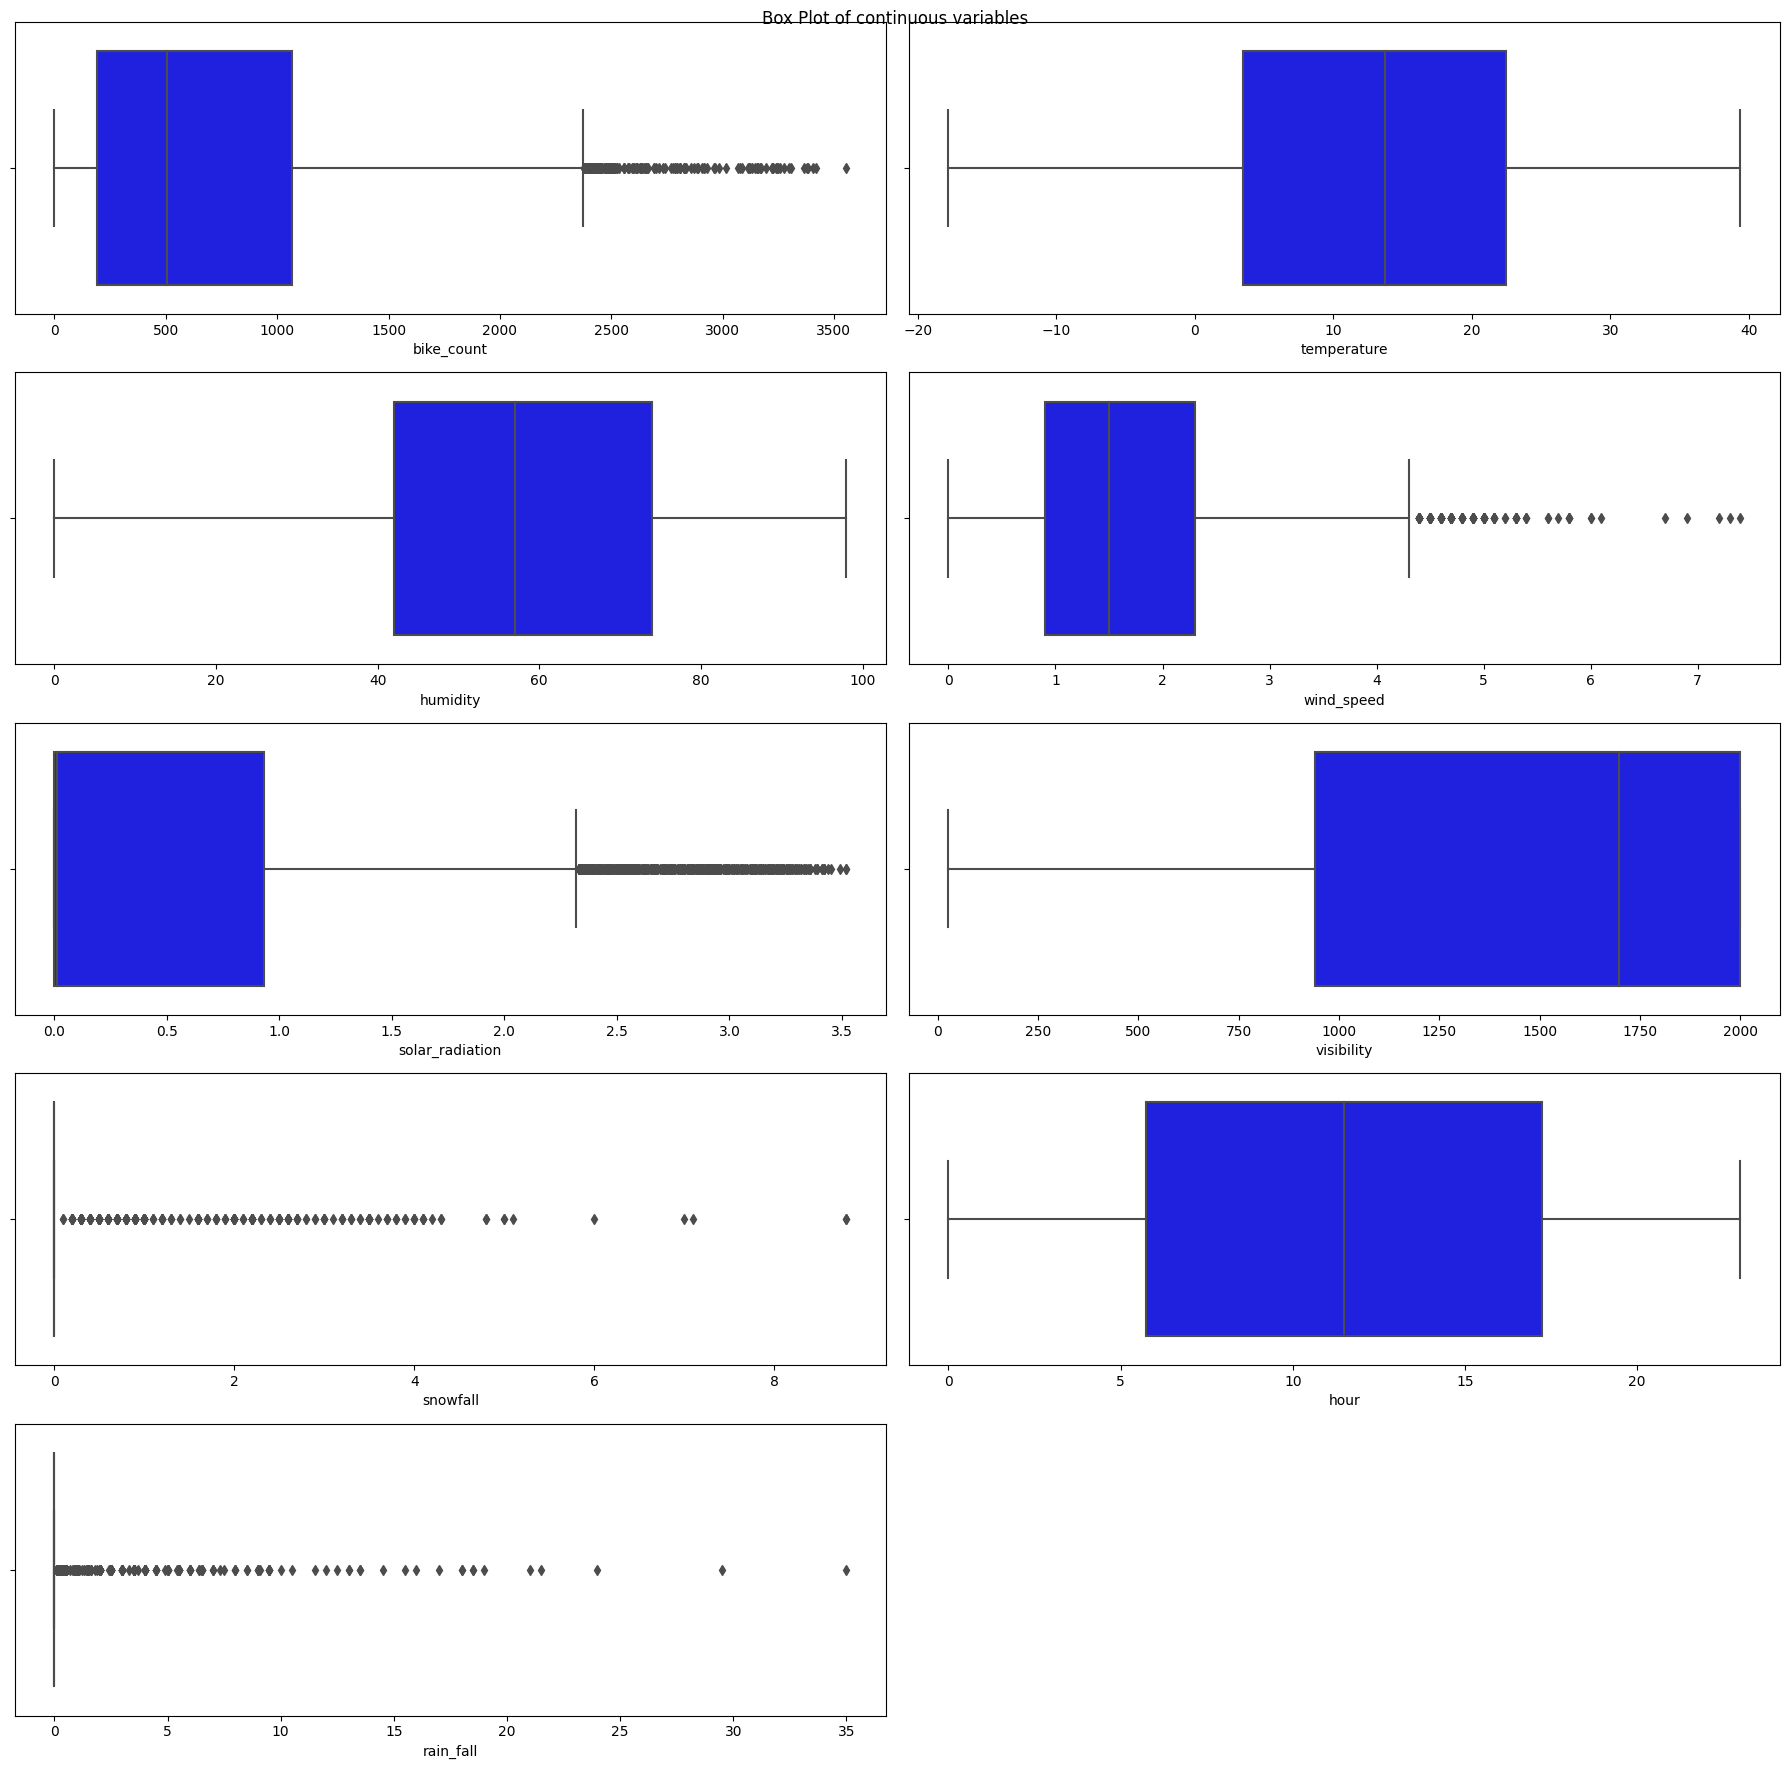

In [ ]:
plt.figure(figsize=(18, 18)) #need clear view with proper visualisation and good looking appeal
for i, col in enumerate(bike_df[cols]) :
    ax = plt.subplot(5,2, i+1)
    sns.boxplot(data=bike_df, x=col, ax=ax,color='blue')
plt.suptitle('Box Plot of continuous variables')
plt.tight_layout()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

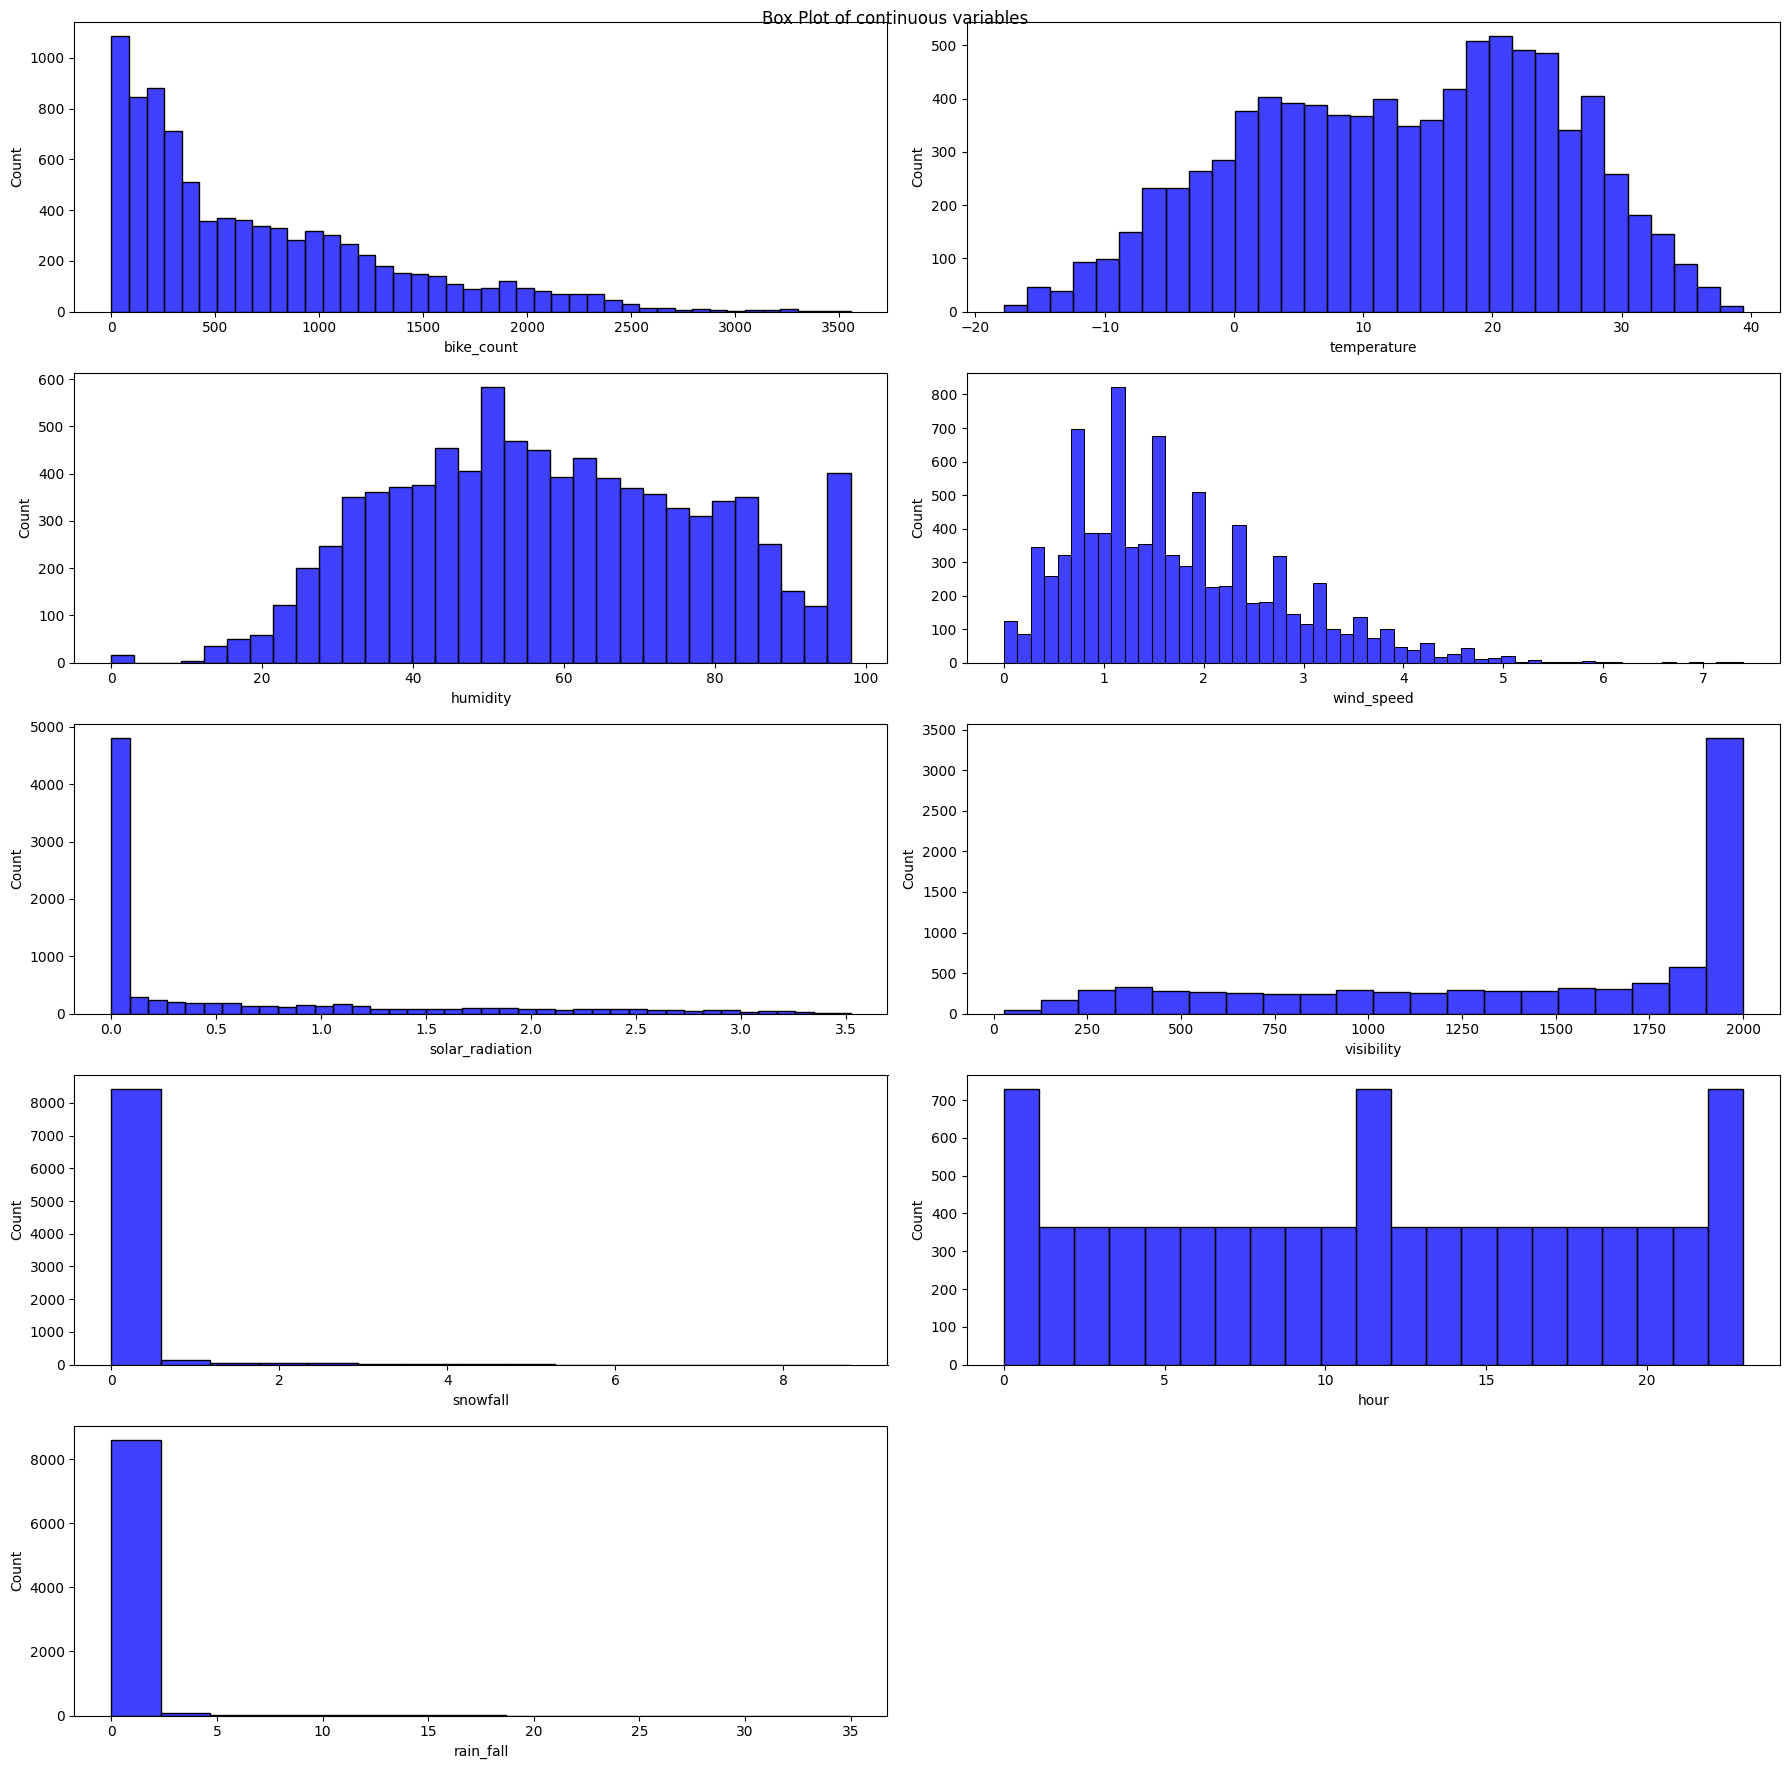

In [ ]:
plt.figure(figsize=(18, 18)) #need a better alternative to as of how does that makes better difference than this one
for i, col in enumerate(bike_df[cols]) :
    ax = plt.subplot(5,2, i+1)
    sns.histplot(data = bike_df, x=col, ax=ax,color='blue')
plt.suptitle('Box Plot of continuous variables')
plt.tight_layout()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

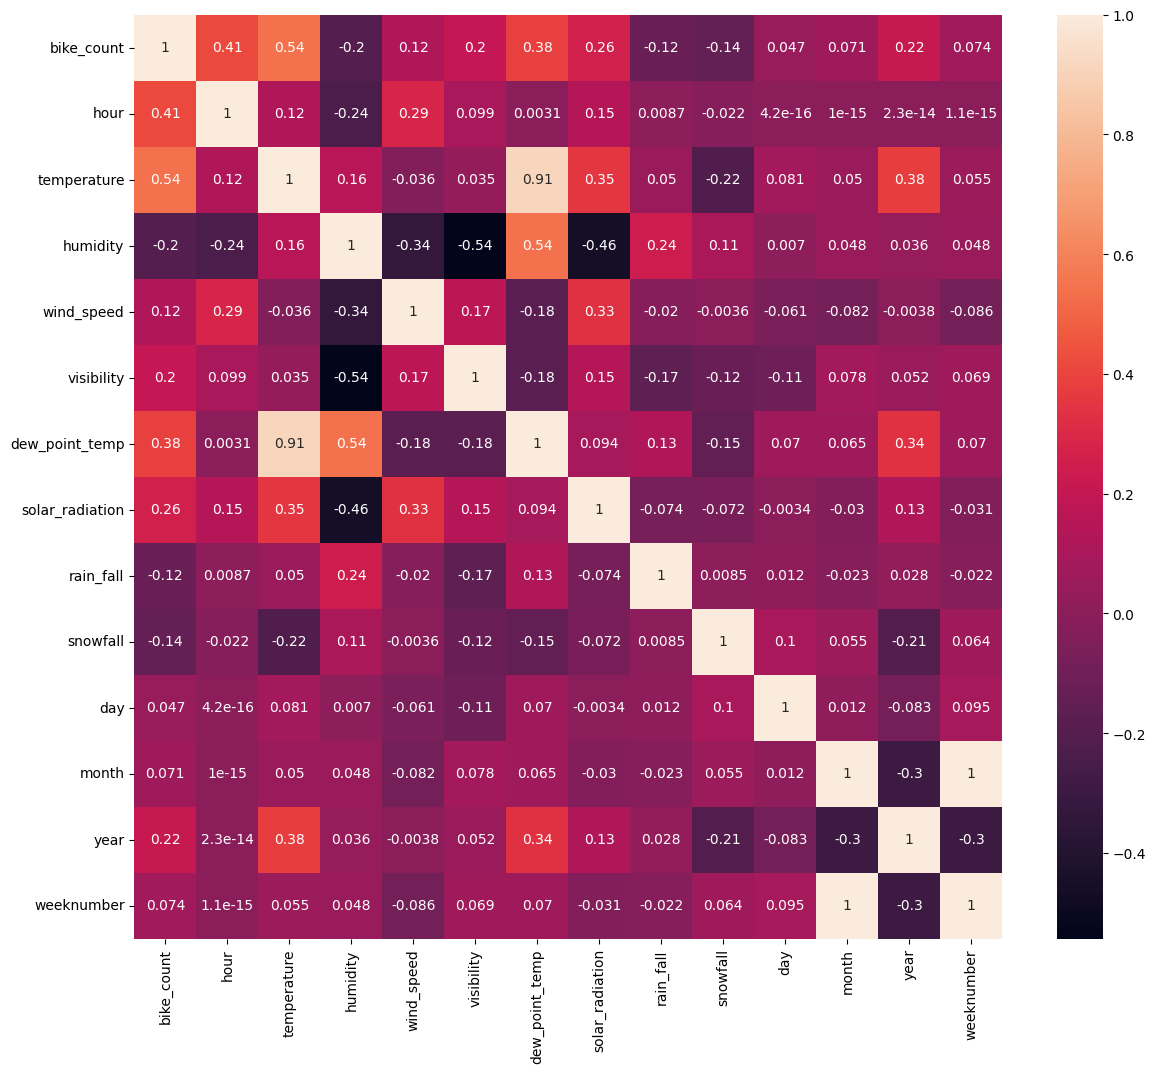

In [ ]:
# Correlation Heatmap visualization code

plt.figure(figsize = (14,12))

sns.heatmap(bike_df.corr(), annot =True);

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

<Figure size 1800x1800 with 0 Axes>

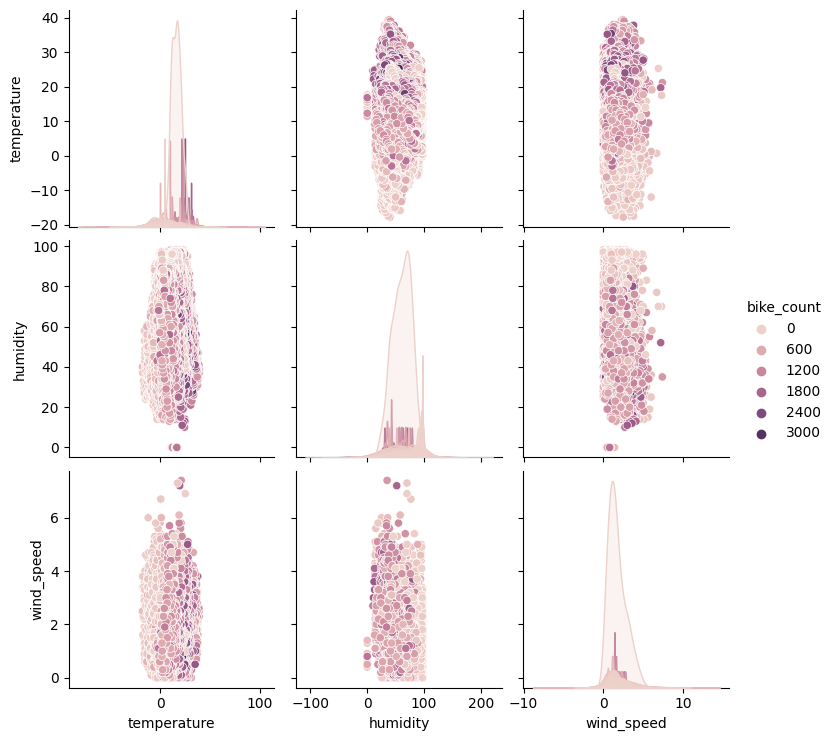

In [ ]:
plt.figure(figsize = (18,18)) #need better pairplots
sns.pairplot(bike_df[cols[:4]], hue = 'bike_count')

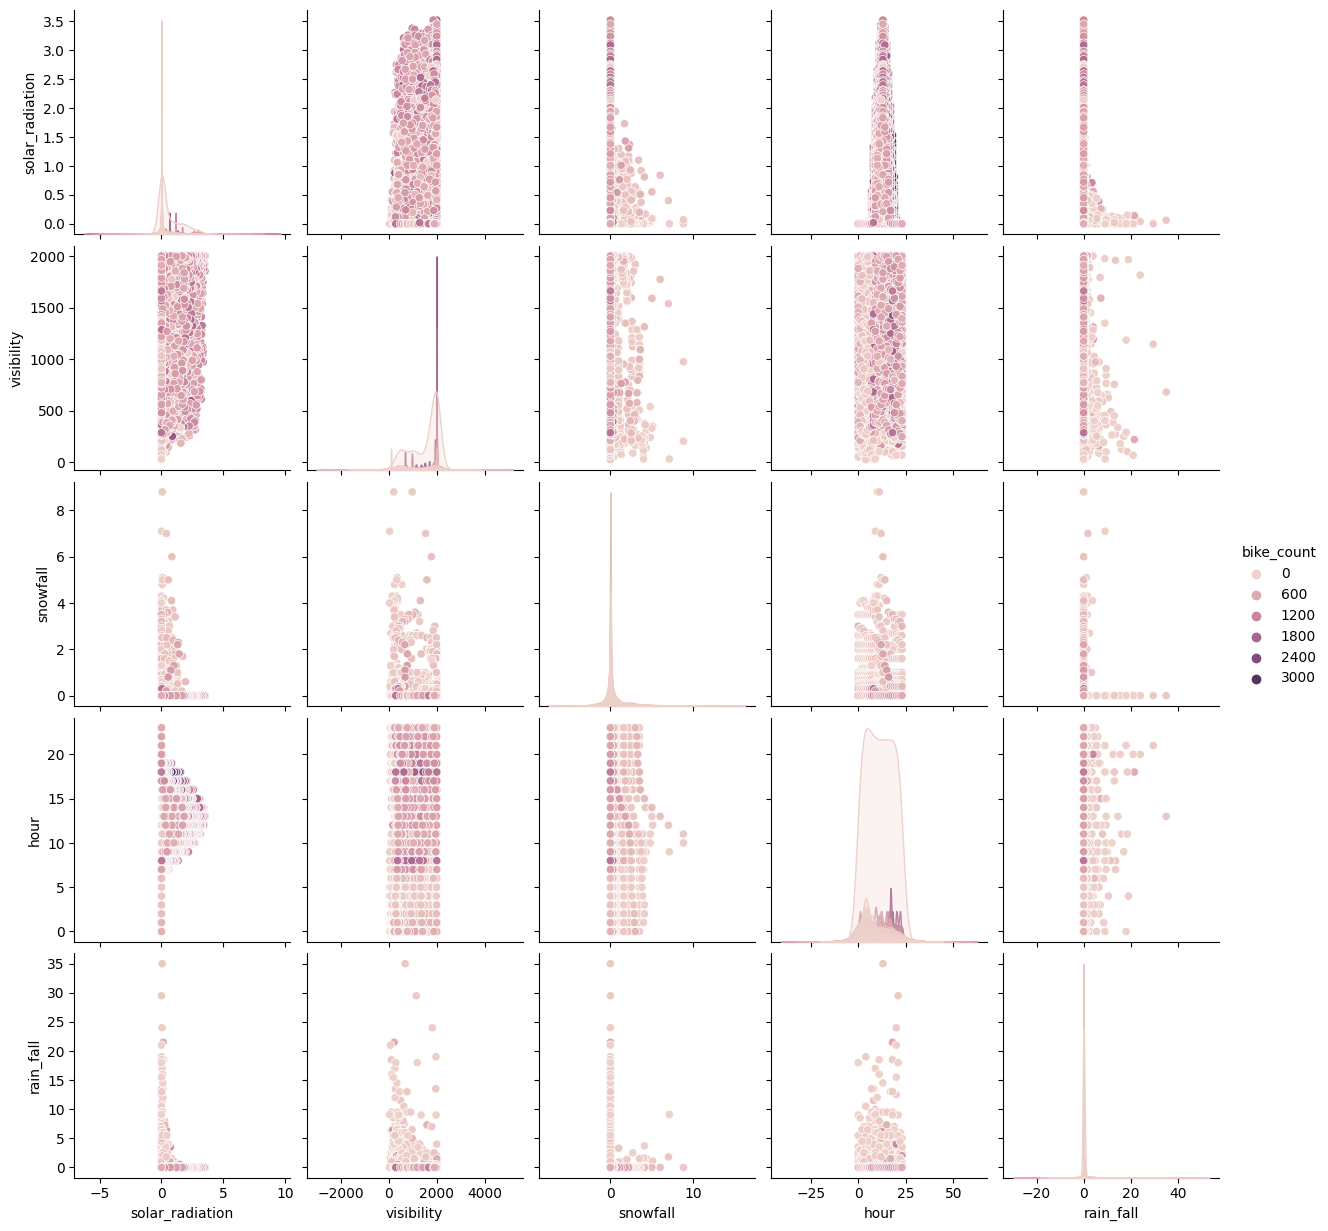

In [ ]:
sns.pairplot( data = bike_df, hue = 'bike_count',vars =cols[4:])


In [ ]:
#need more clear and comprehensive plots , they need to be concise and understanding the bussiness issues

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***
clear proper hypothesis testing , understanding what am i doing behind the data and getting a clear view of how to extract proper p value with significance

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis(H0): spring season rented bike count is equals to winter season every hour.

Alternate hypothesis(H1): spring season rented bike count is not equals to winter season every hour.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

#paired t-test for above, anova for comparing all seasons

In [ ]:
import scipy.stats as stats


spring_counts = bike_df[bike_df['season']=='spring']['bike_count']

winter_counts = bike_df[bike_df['season']=='winter']['bike_count']


In [ ]:
obs_diff = np.mean(spring_counts) - np.mean(winter_counts)

# Create an array of concatenated bike rental counts
concat_counts = np.concatenate((spring_counts, winter_counts))

# Set the number of permutations to perform
n_perms = 10000

# Perform permutation test
permuted_diffs = []
for i in range(n_perms):
    # Randomly permute the labels of the concatenated counts
    permuted_labels = np.random.permutation(concat_counts)
    permuted_counts = concat_counts[permuted_labels]

    # Compute the difference in means between the permuted samples
    permuted_diff = np.mean(permuted_counts[:len(spring_counts)]) - np.mean(permuted_counts[len(spring_counts):])
    permuted_diffs.append(permuted_diff)

# Compute the p-value
p_value = np.mean(np.abs(permuted_diffs) >= np.abs(obs_diff))

# Print the results
print('Permutation test p-value:', p_value)

Permutation test p-value: 0.0


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis(H0): With increase in temperature there no effect in change of bike count.

Alternate hypothesis(H1) : With increase in temperature there is effect in change of bike count.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value


#two sample t_test

In [ ]:
import scipy.stats as stats

temp_high = bike_df[bike_df["temperature"] > 20]["bike_count"]
temp_low = bike_df[bike_df["temperature"] <= 20]["bike_count"]


In [ ]:
t_statistic, p_value = stats.ttest_ind(temp_high, temp_low)

print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 47.202648833873496
p-value: 0.0


##### Which statistical test have you done to obtain P-Value?

two sample t test

##### Why did you choose the specific statistical test?

The ttest_ind() function takes two arrays of data as input, representing the two groups to be compared. It assumes that the data is normally distributed and that the variances of the two groups are equal

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis(H0): snowfall and visibility are independent

Alternate Hypothesis(H1): snowfall and visibility are dependent

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

#pearson correlaton test statistic

In [ ]:
from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient and p-value
corr, p = pearsonr(bike_df["snowfall"], bike_df["visibility"])

In [ ]:
print("Pearson correlation coefficient:", corr)
print("p-value:", p)

Pearson correlation coefficient: -0.12169451457614433
p-value: 2.9317955166589017e-30


##### Which statistical test have you done to obtain P-Value?

Pearson correlation coefficient

##### Why did you choose the specific statistical test?

Since both snowfall and visibility are two continuous variables we choose
the Pearson correlation coefficient  because it is a commonly used statistic to measure the strength and direction of the linear relationship between two continuous variables. The Pearson correlation coefficient ranges from -1 to 1, with values of -1 indicating a perfect negative linear relationship, 0 indicating no linear relationship, and 1 indicating a perfect positive linear relationship.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
bike_df.isnull().sum()


bike_count         0
hour               0
temperature        0
humidity           0
wind_speed         0
visibility         0
dew_point_temp     0
solar_radiation    0
rain_fall          0
snowfall           0
season             0
holiday            0
functioning_day    0
day                0
month              0
year               0
weeknumber         0
temp_grade         0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

why should i handle outliers how does it make any difference,
how it is compared to vanila model

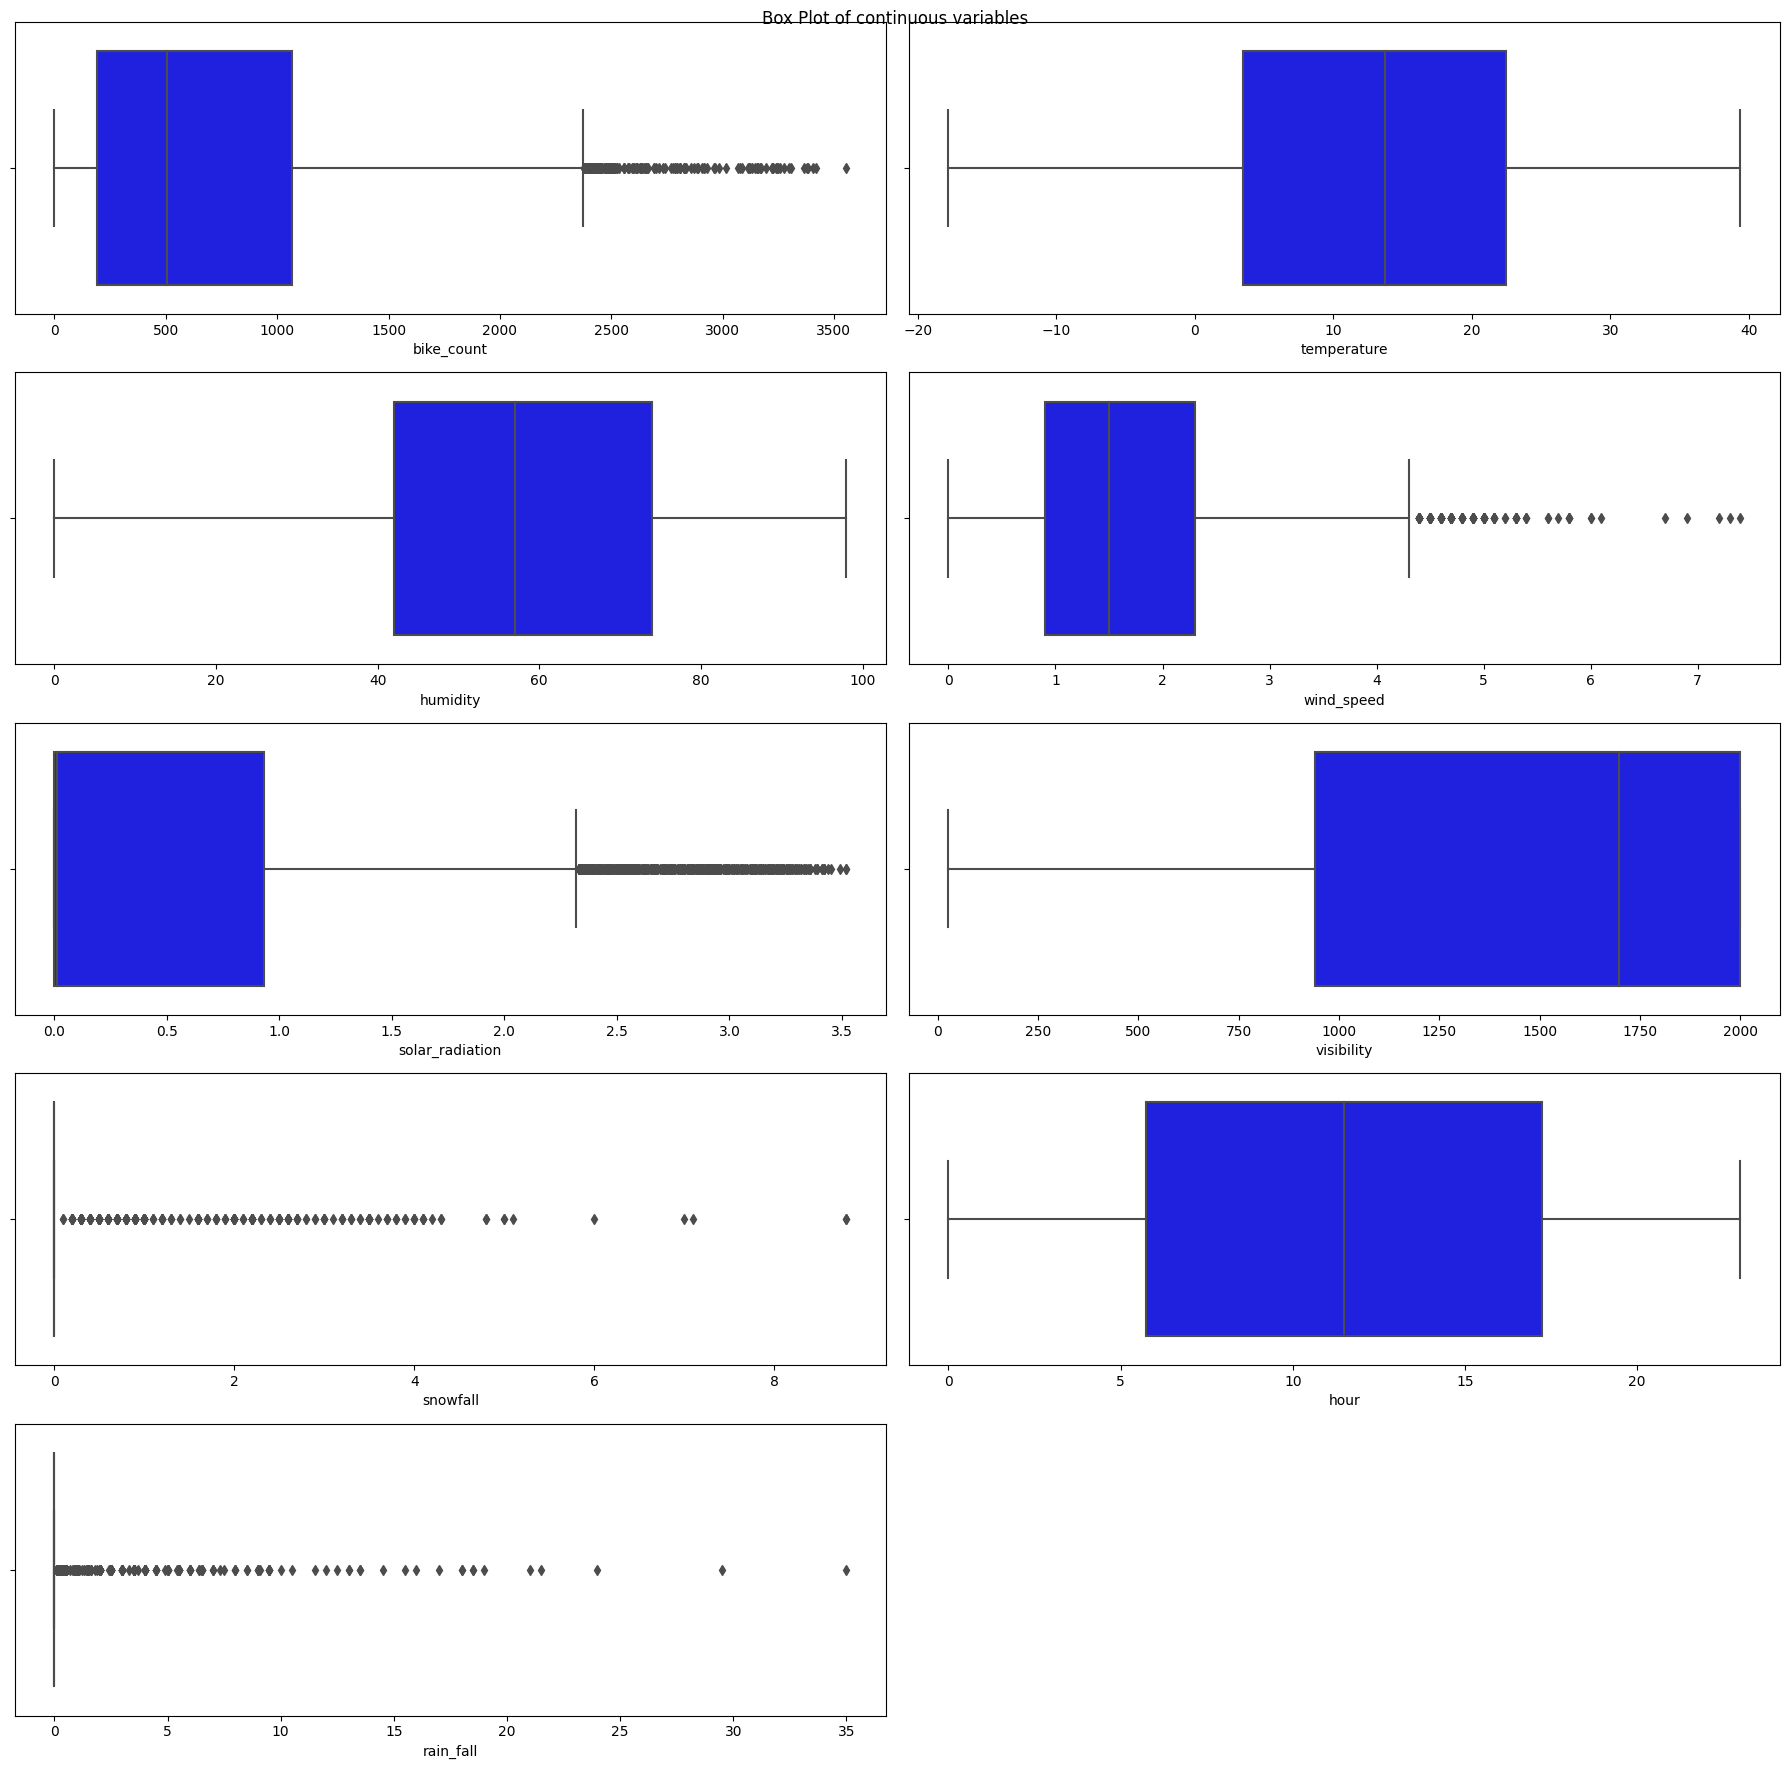

In [ ]:
# Handling Outliers & Outlier treatments
plt.figure(figsize=(18, 18))
for i, col in enumerate(bike_df[cols]) :
    ax = plt.subplot(5,2, i+1)
    sns.boxplot(data=bike_df, x=col, ax=ax,color='blue')
plt.suptitle('Box Plot of continuous variables')
plt.tight_layout()

In [ ]:
bike_df['bike_count'].quantile(0.95)

2043.0

In [ ]:
max_threshold =bike_df['bike_count'].quantile(0.95)
max_threshold

2043.0

In [ ]:
min_threshold = bike_df['bike_count'].quantile(0.05)
min_threshold

22.0

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

1.   what encoding used how does it affect the outcome
2.   comparing one and other



In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

1. what does it means get to know better and do the required

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection
1. should i use random forest as mentioned by friend or how does this works properly

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

1. what type of scaling and how does it effect the accuracy

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***